Cross-validation scores: [0.95238095 0.9047619  0.9047619  1.         0.9047619 ]
Mean CV score: 0.93 (+/- 0.08)

Test set accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



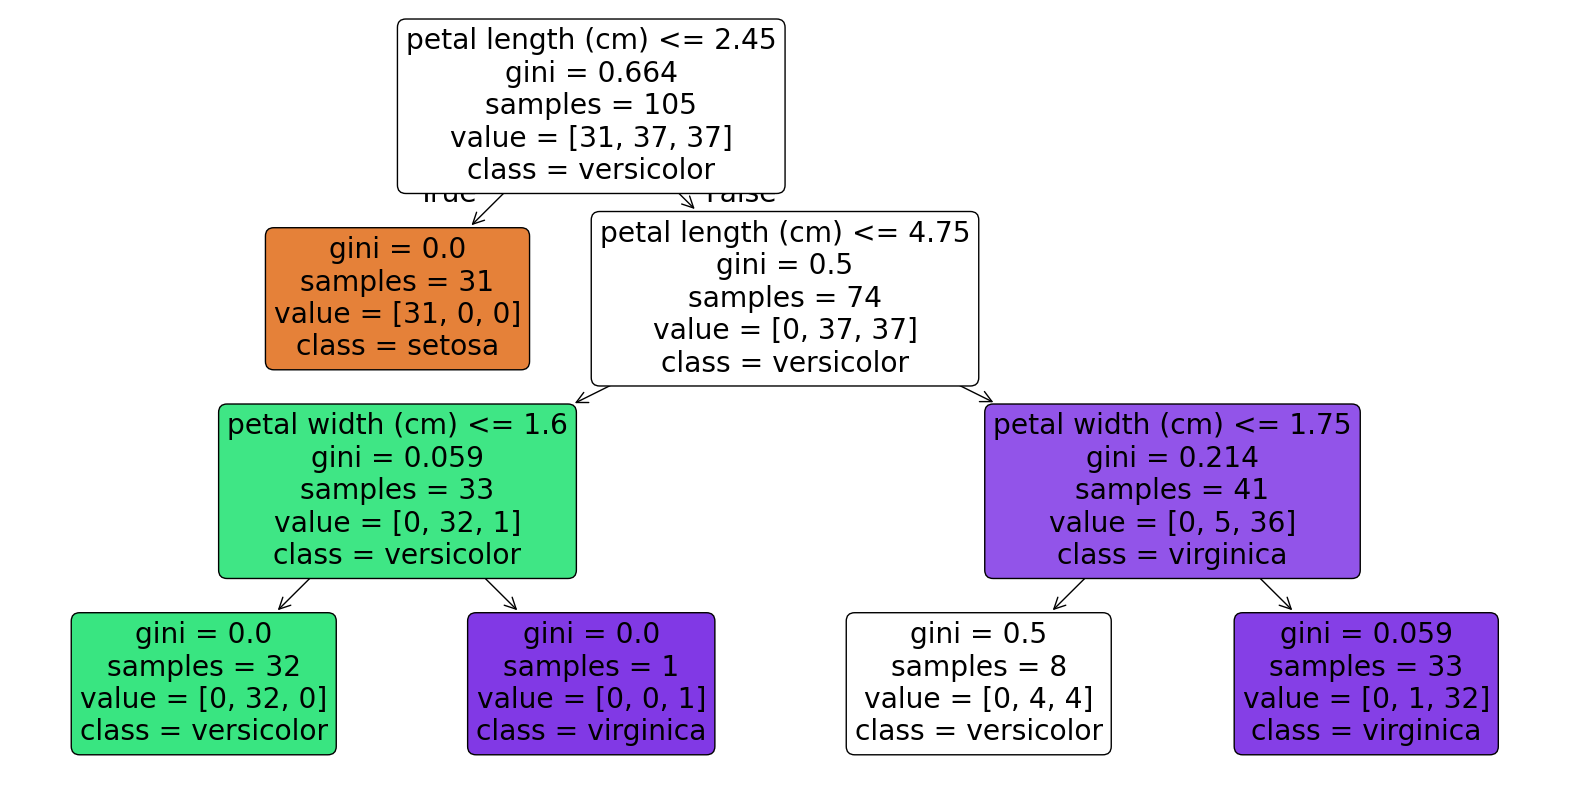

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the model with some basic measures to prevent overfitting
model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=5, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest set accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=load_iris().target_names))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=load_iris().feature_names, 
          class_names=load_iris().target_names, filled=True, rounded=True)
plt.show()